In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib

In [2]:
df_all = {}

In [3]:
ESTN = ["LinearRegression", "ElasticNet", "SVM regressor", "XGBoost"]

In [45]:
rename_names = {"label_LUM5_single" : "land use mix", 
                  "label_RNR_nres" : "residential/non-res.",
                  "label_mdist_smallparks": "nearest small park",
                  "label_hType_mix" :"housing type mix", 
                  "label_nig_rat_daily" : "nightlife", 
                  "label_nig_rat_daily3" : "nightlife density", 
                  "label_mdist_nres_daily" : "nearest daily-use POI",
                  "label_num_community_places" : "community places", 
#                   "label_num_community_places_poi": "third places",
                    "label_avg_block_area": "average block size"
                      ,"label_num_intersect": "intersections density"
                      , "label_sphi" : "anisotropicity blocks"}

In [46]:
for est_name in ESTN:
    df_all[est_name] = \
    pd.read_csv("../../../../results/prediction/districts/regression/two_cat_variables"+est_name+".csv")
    
    df_all[est_name]["R2"] = df_all[est_name]["R2"].astype(float).apply(lambda x: max(x, 0))
    df_all[est_name]["R2std"] = df_all[est_name][["R2", "R2std"]].astype(float).\
            apply(lambda x: 0 if x["R2"]==0 else x[1], axis=1)
    df_all[est_name].drop(index=11, inplace=True)
    df_all[est_name].drop(index=7, inplace=True)
    df_all[est_name]["var2"] = df_all[est_name]["variable"].apply(lambda x: rename_names[x])

In [47]:
df_all["XGBoost"]

,variable,R2,R2std,mae,maestd,var2
0,label_LUM5_single,0.177255,0.205689,0.187730,0.021849,land use mix
1,label_RNR_nres,0.000000,0.000000,0.224166,0.026192,residential/non-res.
2,label_mdist_smallparks,0.253793,0.129308,0.153074,0.019972,nearest small park
3,label_hType_mix,0.193757,0.181756,0.165654,0.025525,housing type mix
4,label_nig_rat_daily,0.000000,0.000000,0.175411,0.025917,nightlife
5,label_mdist_nres_daily,0.507610,0.188510,0.134475,0.027284,nearest daily-use POI
6,label_num_community_places,0.592310,0.057390,0.119677,0.013877,community places
8,label_avg_block_area,0.408264,0.031797,0.140703,0.013275,average block size
9,label_num_intersect,0.616406,0.036812,0.115215,0.016399,intersections density
10,label_sphi,0.205947,0.132407,0.155531,0.019160,anisotropicity blocks


In [57]:
def subcategorybar(X, vals, ers, l, c, what, width=0.8):
    
    font = {'family' : 'normal',
        'size'   : 16}

    matplotlib.rc('font', **font)
    
    fig, ax = plt.subplots(figsize=(12,5))
    
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        ax.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge",
               yerr=ers[i], ecolor= "gray",
              label=l[i], color=c[i])   
    plt.xticks(_X, X)
    plt.xticks(rotation=50)
    
    plt.ylim([0,.51])

    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
#     plt.legend(frameon=False)
    
    ax.set_ylabel(what)
    
    plt.tight_layout()
    
    plt.savefig("../../../../results/prediction/districts/regression/two_cat_" + what+".png", dpi=100)

In [49]:
ESTC = {"LinearRegression":"violet", "ElasticNet":"yellowgreen", 
        "SVM regressor":"royalblue", "XGBoost":"rosybrown"}


In [50]:
X = list(df_all["XGBoost"]["var2"])
# [x + " R2" for x in list(df_all["XGBoost"]["var2"])]
Y = []
E = []
L = []
C = []
for est_name in ESTN:
    print (est_name, ESTC[est_name])
    df = df_all[est_name]
    Y.append(list(df["R2"]))
    E.append(list(df["R2std"]))
    L.append(est_name)
    C.append(ESTC[est_name])

LinearRegression violet
ElasticNet yellowgreen
SVM regressor royalblue
XGBoost rosybrown


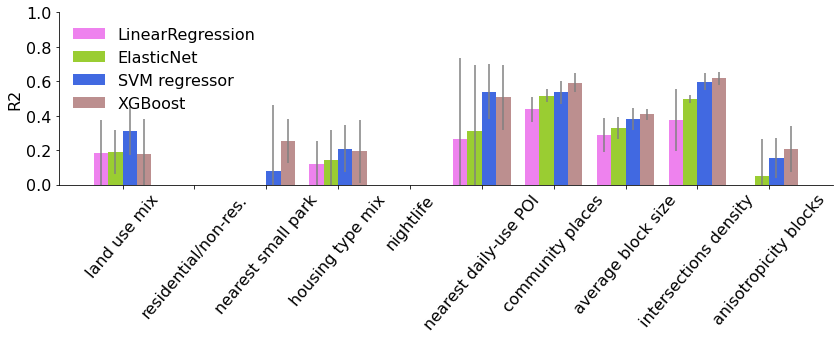

In [51]:
subcategorybar(X, Y, E, L, C, "R2")

In [58]:
X = list(df_all["XGBoost"]["var2"])
# [x + " R2" for x in list(df_all["XGBoost"]["var2"])]
Y = []
E = []
L = []
C = []
for est_name in ESTN:
    print (est_name, ESTC[est_name])
    df = df_all[est_name]
    Y.append(list(df["mae"]))
    E.append(list(df["maestd"]))
    L.append(est_name)
    C.append(ESTC[est_name])

LinearRegression violet
ElasticNet yellowgreen
SVM regressor royalblue
XGBoost rosybrown


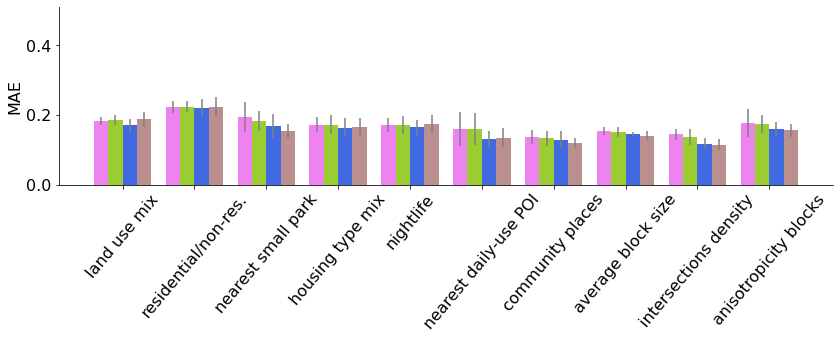

In [59]:
subcategorybar(X, Y, E, L, C, "MAE")